In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#verificar que los datos se hayan cargado correctamente
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**1-Limpieza de datos con Python:**
**-Identificar y solucionar cualquier valor duplicado.**

In [5]:
#Detectar filas duplicadas
filas_duplicadas= df.duplicated()

#Mostrar las filas duplicadas si es que hay
print(filas_duplicadas[filas_duplicadas == True])

# Contar cuántas filas duplicadas hay
print(f"Número de filas duplicadas: {filas_duplicadas.sum()}")

Series([], dtype: bool)
Número de filas duplicadas: 0


*(No se encuentran valores duplicados en el archivo del dataset)*

-**Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.**

In [7]:
# Verificar los tipos de datos
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
# Convertir 'TotalCharges' a string para asegurar la operación con .str
df['TotalCharges'] = df['TotalCharges'].astype(str)
# Eliminar espacios en blanco al inicio o al final de los valores en 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].str.strip()

#convertir 'TotalCharges' en un dato numerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**-Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).**

In [11]:
#identificar todas las columnas de tipo texto
text_columns = df.select_dtypes(include='object').columns
print(text_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [12]:
#usando un for para convertir todos los valores de las columnas en mayusculas y reducir codigos
for column in text_columns:
  df[column]= df[column].str.upper()


#verificamos los cambios imprimiendo los valores unicos de las columnas
#nuevamente con un cliclo for para imprimir todos los cambios
for column in text_columns:
  print(f"valores unicos en '{column}':")
  print(df[column].unique())




valores unicos en 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
valores unicos en 'gender':
['FEMALE' 'MALE']
valores unicos en 'Partner':
['YES' 'NO']
valores unicos en 'Dependents':
['NO' 'YES']
valores unicos en 'PhoneService':
['NO' 'YES']
valores unicos en 'MultipleLines':
['NO PHONE SERVICE' 'NO' 'YES']
valores unicos en 'InternetService':
['DSL' 'FIBER OPTIC' 'NO']
valores unicos en 'OnlineSecurity':
['NO' 'YES' 'NO INTERNET SERVICE']
valores unicos en 'OnlineBackup':
['YES' 'NO' 'NO INTERNET SERVICE']
valores unicos en 'DeviceProtection':
['NO' 'YES' 'NO INTERNET SERVICE']
valores unicos en 'TechSupport':
['NO' 'YES' 'NO INTERNET SERVICE']
valores unicos en 'StreamingTV':
['NO' 'YES' 'NO INTERNET SERVICE']
valores unicos en 'StreamingMovies':
['NO' 'YES' 'NO INTERNET SERVICE']
valores unicos en 'Contract':
['MONTH-TO-MONTH' 'ONE YEAR' 'TWO YEAR']
valores unicos en 'PaperlessBilling':
['YES' 'NO']
valores unicos en 'PaymentMet

**-Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.**

In [34]:
#Verificar si hay datos faltantes
valores_nulos = df.isnull().sum()
print(valores_nulos)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [41]:
# Identificar valores nulos en una columna específica
df.columns
print(df['TotalCharges'].isnull().sum())

# Rellenar valores nulos con la mediana de la columna
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



0


*Se encontraton 11 valores nulos en la columna 'TotalCharges' y se rellenaron con la mediana para evitar distorciones*

**Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).**

In [43]:
#verificar los valores para la columna 'SeniorCitizen' (rango de 0 a 1)
print("valores unicos", df['SeniorCitizen'].unique)
#corregimos cualquier valor inapropiado
df['SeniorCitizen']= df['SeniorCitizen'].apply(lambda x: 0 if x !=1 else 1) #

valores unicos <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>


In [25]:
#Verificamos los valores fuera de rango de 'tenure' en un rango de 0 a 72
tenure_rango= df[(df['tenure'] <0) | (df['tenure'] > 72)]
print("Valores fuera de rango en 'tenure':")
print(tenure_rango)

Valores fuera de rango en 'tenure':
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [51]:
#Hallar el rango de valores
print(f"Máximo valor en 'MonthlyCharges': {df['MonthlyCharges'].max()}")
print(f"Mínimo valor en 'MonthlyCharges': {df['MonthlyCharges'].min()}")

#verificamos si hay valores fuera de rango
rango_MonthlyCharges= df[(df['MonthlyCharges'] < 18.25) | (df['MonthlyCharges'] > 118.75)]
print(f"valores fuera de rango: {rango_MonthlyCharges}")


Máximo valor en 'MonthlyCharges': 118.75
Mínimo valor en 'MonthlyCharges': 18.25
valores fuera de rango: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [53]:
#Hallar el rango de valores
print(f"Máximo valor en 'TotalCharges': {df['TotalCharges'].max()}")
print(f"Mínimo valor en 'TotalCharges': {df['TotalCharges'].min()}")

#verificamos si hay valores fuera de rango
rango_TotalCharges= df[(df['TotalCharges'] < 18.8) | (df['TotalCharges'] > 8684.8)]
print(f"valores fuera de rango: {rango_TotalCharges}")

Máximo valor en 'TotalCharges': 8684.8
Mínimo valor en 'TotalCharges': 18.8
valores fuera de rango: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


*no se encontraron datos inusuales en ninguna columna numerica*

#**2-Exploración de datos con Python:**
**Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

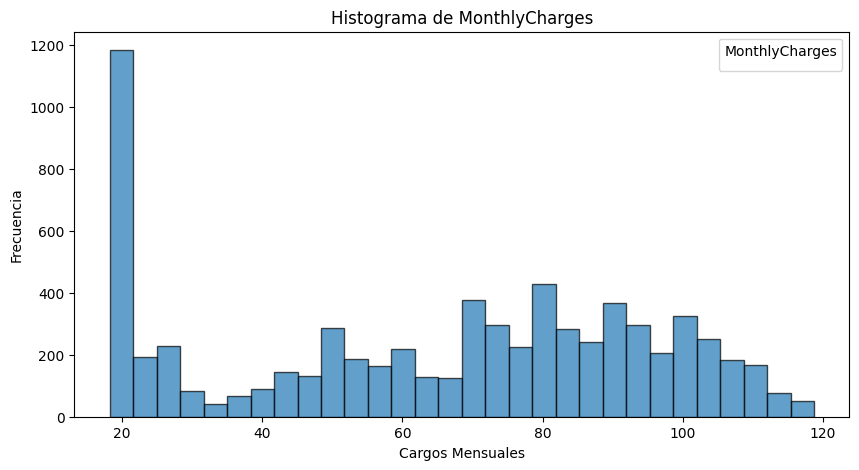

In [20]:
# Visualización 1: Histograma de 'MonthlyCharges'
plt.figure(figsize=(10, 5))
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de MonthlyCharges')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='MonthlyCharges')
plt.show()

-INTERPRETACION

El histograma muestra que la mayoría de los clientes pagan entre **20 y 40** en cargos mensuales, lo que indica una mayor concentración en los planes más económicos. Sin embargo, también se observa una dispersión hacia cargos más altos, hasta cerca de 120. Esta dispersión sugiere que algunos clientes optan por servicios premium o múltiples servicios adicionales.


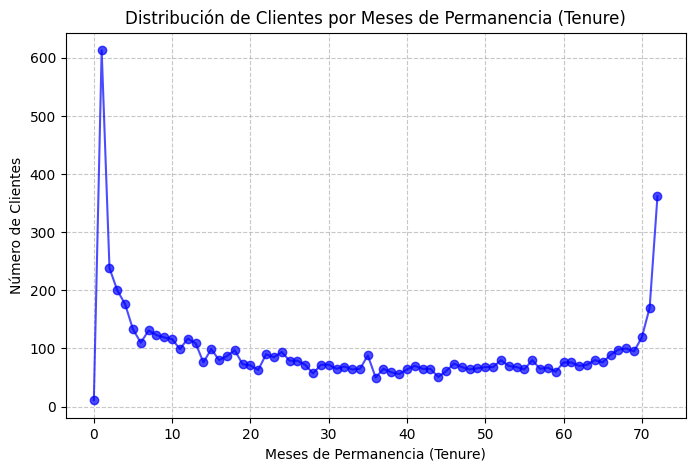

In [19]:
#contar la frecuencia de cada valor
tenure_counts = df['tenure'].value_counts().sort_index()

# Crear un gráfico de linas
plt.figure(figsize=(8, 5))
plt.plot(tenure_counts.index, tenure_counts.values, marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Distribución de Clientes por Meses de Permanencia (Tenure)')
plt.xlabel('Meses de Permanencia (Tenure)')
plt.ylabel('Número de Clientes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En el grafico de lineas se muestra como varia los clientes a lo largo de los meses, la mayoria de los clientes permanece menos de 10 meses indicando una baja temprana, se observa tambien un segundo pico a los 72 meses aproximadamente, indicando un grupo que se quedo hasta el final.

**Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

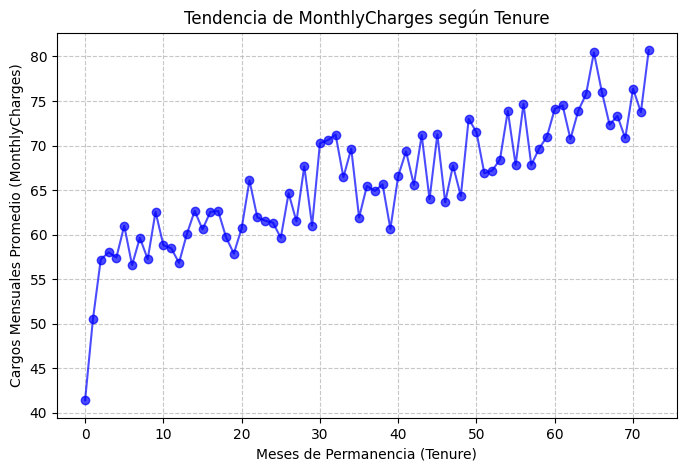

In [22]:
# Calcular la media de MonthlyCharges para cada valor de tenure
tenure_monthly_avg = df.groupby('tenure')['MonthlyCharges'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(tenure_monthly_avg.index, tenure_monthly_avg.values, marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Tendencia de MonthlyCharges según Tenure')
plt.xlabel('Meses de Permanencia (Tenure)')
plt.ylabel('Cargos Mensuales Promedio (MonthlyCharges)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

El grafico de lineas indica que a medida que aumentan los meses de permanencia aumentan los cargos mensuales, lo que podria indicar que los clientes mas antiguos contratan mas servivios de mayor costo.

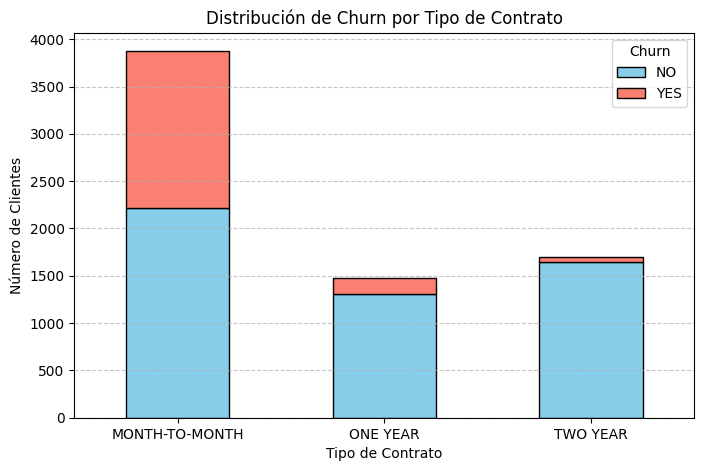

In [23]:
# Contar las combinaciones de 'Contract' y 'Churn'
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Crear el gráfico de barras apiladas
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El grafico indica que en los planes de mes a mes hay mas clientes que abandonan en comparacion a los planes de un año o dos, lo que indica que los contratos largos retienen a mas clientes